In [97]:
#Tarea 1 sismología
import matplotlib.pyplot as plt #modulo para graficar
import numpy as np              #este modulo es para trabajar con matrices como en matlab
import pandas as pd             #modulo para leer archivos
import csv
import scipy.optimize as opt

Chile = np.loadtxt('Chile.dat')   #tiene 2 columnas
Fosa = np.loadtxt('fosa.dat')     #tiene 2 columnas
Punitaqui = pd.read_csv('Punitaqui.csv', sep=',', skiprows = 0)
PunitaquiEX = pd.read_csv('Punitaque_extendo.csv', sep = ',', skiprows = 0)
Chili = pd.read_csv('Chilean_sismi.csv', sep = ',', skiprows = 0)
 

# cosas que usare

latFosa = Fosa[:,0]
longFosa = Fosa[:,1]

latCosta = Chile[:,1]
longCosta = Chile[:,0]


# datos de punitaqui
timeP = Punitaqui['time']
latP = Punitaqui['latitude']
lonP = Punitaqui['longitude']
dephtP = Punitaqui['depth']
magP = Punitaqui['mag']

# datos de punitaqui extendidos
timePE = PunitaquiEX['time']
latPE = PunitaquiEX['latitude']
lonPE = PunitaquiEX['longitude']
dephtPE = PunitaquiEX['depth']
magPE = PunitaquiEX['mag']

# datos para la p2
timeC = Chili['time']
latC = Chili['latitude']
lonC = Chili['longitude']
dephtC = Chili['depth']
magC = Chili['mag']


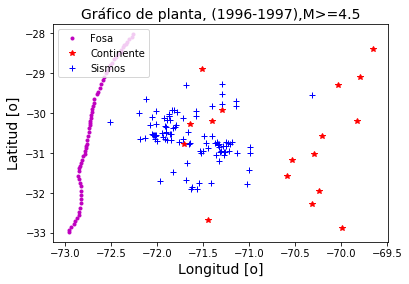

In [96]:
# Los archivos que nos dieron tienen a TODO chile y a TODA la fosa asi que los filtro en el rango pedido
def nuevaCostaFosa(longFosa, latFosa, minlat, maxlat):
    nuevalongFosa = []
    nuevalatFosa = []
    for i in range(len(longFosa)):
        if latFosa[i] <= maxlat :
            if latFosa[i] >= minlat:
                nuevalongFosa.append(longFosa[i])
                nuevalatFosa.append(latFosa[i])
    nuevo = [nuevalongFosa, nuevalatFosa]
    return nuevo

nuevaFosa = nuevaCostaFosa(longFosa, latFosa, -33, -28)
nuevalongFosa = nuevaFosa[0]
nuevalatFosa = nuevaFosa[1]
plt.plot(nuevalongFosa, nuevalatFosa, 'm.', label = 'Fosa')

nuevaCosta = nuevaCostaFosa(longCosta, latCosta, -33, -28)
nuevalongCosta = nuevaCosta[0]
nuevalatCosta = nuevaCosta[1]
plt.plot(nuevalongCosta,nuevalatCosta, 'r*', label = 'Continente')

plt.plot(lonP, latP, 'b+', label = 'Sismos')

plt.title('Gráfico de planta, (1996-1997),M>=4.5', fontsize = 14) #titulo 
plt.ylabel('Latitud [o]', fontsize = 14) #rotulos de los ejes
plt.xlabel('Longitud [o]', fontsize = 14)
plt.legend(loc = 'upper left')
plt.savefig('P1_1.jpg')
plt.show()

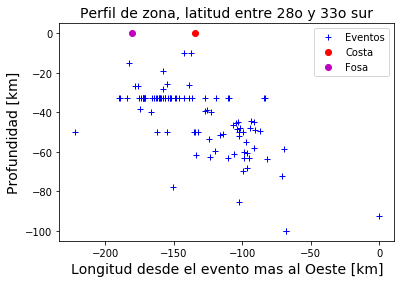

In [95]:

def rango(latDat, longDat, dephtDat, minlat, maxlat):
    nuevaLong = []
    nuevaProf = []
    for i in range(len(longDat)):
        if latDat[i]<=maxlat: 
            if latDat[i] > minlat:
                nuevaLong.append(longDat[i])
                nuevaProf.append(-dephtDat[i]) 
    nuevo = [nuevaLong, nuevaProf]
    return nuevo

aux = rango(latP,lonP,dephtP,-33,-28)
filteredLong = aux[0]
newDepht = aux[1]

adjustedLong = []
for i in range(len(filteredLong)):
    adjustedLong.append(111.18*np.cos(31)*(filteredLong[i] - max(filteredLong)))
    i += 1

plt.plot(adjustedLong,newDepht,'b+',label='Eventos')
plt.plot(111.18*np.cos(31)*(-71.64557 - max(filteredLong)),0,'ro',label = 'Costa') #linea costa
plt.plot(111.18*np.cos(31)*(-72.809998 - max(filteredLong)) - min(filteredLong),0,'mo',label = 'Fosa') #linea fosa
plt.xlabel('Longitud desde el evento mas al Oeste [km]',fontsize = 14) #se rotulan ejes y título
plt.ylabel('Profundidad [km]',fontsize = 14)
plt.title('Perfil de zona, latitud entre 28o y 33o sur',fontsize = 14)
plt.legend()
plt.savefig('P1_2.jpg')
plt.show() #Con este grafico, estimando con 2 puntos en la recta podemos decir que el angulo de subduccion 
           #desde la superficie es aprox 31º


<function matplotlib.pyplot.show(*args, **kw)>

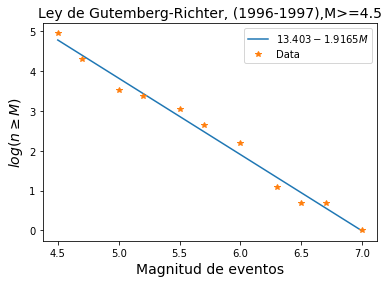

In [94]:
n = []
M = [4.5, 4.7, 5, 5.2, 5.5, 5.7, 6, 6.3, 6.5, 6.7, 7]
for i in range(len(M)):
    n.append(0)
    for j in range(len(magPE)):
        if magPE[j] >= M[i]:
            n[i] += 1
            j += 1
        else:
            j += 1
    i += 1
    
def model(x):
    return 13.403 - 1.9165 * x 
x = np.linspace(4.5 , 7 , 100)

plt.plot(x,model(x),label='$13.403 - 1.9165M$')    
plt.plot(M,np.log(n),'*', label='Data')
plt.title('Ley de Gutemberg-Richter, (1996-1997),M>=4.5', fontsize = 14) #titulo 
plt.ylabel('$log(n\geq M)$', fontsize = 14) #rotulos de los ejes
plt.xlabel('Magnitud de eventos', fontsize = 14)
plt.legend(loc = 'upper right')
plt.savefig('P1_3.jpg')
plt.show

[  1.8876202  -10.33502538]


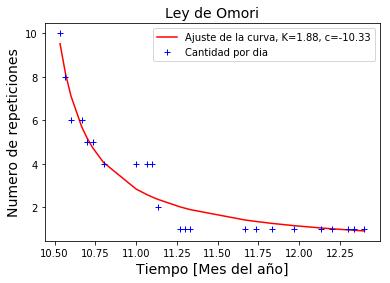

In [93]:
anoP = []
mesP = []
diaP = []
for i in range(len(timeP)):
    anoP.append(int(timeP[i][:4]))
    mesP.append(int(timeP[i][5:7]))
    diaP.append(int(timeP[i][8:10]))
    i +=1

NanoP = anoP[0:42]
NmesP = mesP[0:42]
NdiaP = diaP[0:42]
NmagP = magP[0:42]

diaBath = []
for i in range(len(NanoP)):
    diaBath.append(NmesP[i] + NdiaP[i]/30)

def omori(diaBath,magOmori):
    numero = []
    diaSinRep = []
    n = 1
    for i in range(len(diaBath) - 1):
        if diaBath[i] == diaBath[i + 1]:
            n += 1
        else:
            numero.append(n)
            diaSinRep.append(diaBath[i]) 
    return [numero,diaSinRep]
OmoriFinal = omori(diaBath,NmagP)
numeroOmoriFinal = OmoriFinal[0]
diaOmoriFinal = OmoriFinal[1]

def fitting(t,K,c):
    b=K/(t+c)
    return b

optimizedParameters, pcov = opt.curve_fit(fitting, diaOmoriFinal, numeroOmoriFinal);

print(optimizedParameters)

plt.plot(diaOmoriFinal, fitting(diaOmoriFinal, *optimizedParameters),'r',label='Ajuste de la curva, K=1.88, c=-10.33');
plt.plot(diaOmoriFinal,numeroOmoriFinal,'b+',label='Cantidad por dia')
plt.xlabel('Tiempo [Mes del año]',fontsize=14) #se rotulan ejes ytítulo
plt.ylabel('Numero de repeticiones',fontsize=14)
plt.title('Ley de Omori',fontsize=14)
plt.legend()
plt.savefig('P1_4.jpg')
plt.show()

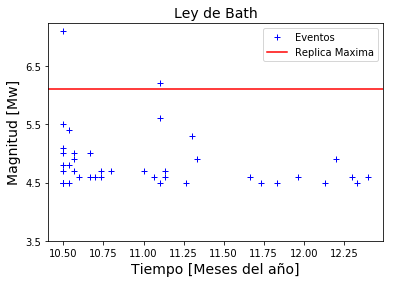

In [91]:
maximo=max(magP)-1.
magOmori2=[]
for i in range(len(magP)):
    if magP[i]!=8.8:
        magOmori2.append(magP[i])
maximaReplica=max(magOmori2)

plt.plot(diaBath,NmagP,'b+',label='Eventos')
plt.axhline(maximo,color='red',label='Replica Maxima')
plt.xlabel('Tiempo [Meses del año]',fontsize=14) #se rotulan ejes ytítulo
plt.ylabel('Magnitud [Mw]',fontsize=14)
plt.yticks(np.arange(3.5, 7.5, 1.0)) 
plt.title('Ley de Bath',fontsize=14)
plt.legend()
plt.savefig('P1_5.jpg')
plt.show()



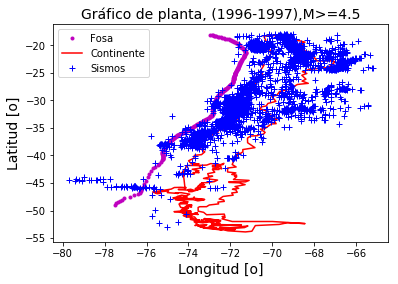

In [92]:
# Los archivos que nos dieron tienen a TODO chile y a TODA la fosa asi que los filtro en el rango pedido
def nuevaCostaFosa(longFosa, latFosa, minlat, maxlat):
    nuevalongFosa = []
    nuevalatFosa = []
    for i in range(len(longFosa)):
        if latFosa[i] <= maxlat :
            if latFosa[i] >= minlat:
                nuevalongFosa.append(longFosa[i])
                nuevalatFosa.append(latFosa[i])
    nuevo = [nuevalongFosa, nuevalatFosa]
    return nuevo

nuevaFosa = nuevaCostaFosa(longFosa, latFosa, -55, -18)
nuevalongFosa = nuevaFosa[0]
nuevalatFosa = nuevaFosa[1]
plt.plot(nuevalongFosa, nuevalatFosa, 'm.', label = 'Fosa')

nuevaCosta = nuevaCostaFosa(longCosta, latCosta, -55, -18)
nuevalongCosta = nuevaCosta[0]
nuevalatCosta = nuevaCosta[1]
plt.plot(nuevalongCosta,nuevalatCosta, 'r', label = 'Continente')

plt.plot(lonC, latC, 'b+', label = 'Sismos')

plt.title('Gráfico de planta, (1996-1997),M>=4.5', fontsize = 14) #titulo 
plt.ylabel('Latitud [o]', fontsize = 14) #rotulos de los ejes
plt.xlabel('Longitud [o]', fontsize = 14)
plt.legend(loc = 'upper left')
plt.savefig('P2_1.jpg')
plt.show()